In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
ds = xr.tutorial.open_dataset("rasm").load()

ds2 = xr.tutorial.load_dataset("air_temperature")

In [3]:
# to celsius
air = ds2.air - 273.15

# resample from 6-hourly to daily values
air = air.resample(time="D").mean()

air

<xarray.DataArray 'air' (time: 730, lat: 25, lon: 53)>
array([[[-31.2775   , -30.849998 , -30.475002 , ..., -39.7775   ,
         -37.975    , -35.475002 ],
        [-28.575005 , -28.5775   , -28.874996 , ..., -41.9025   ,
         -40.324997 , -36.85     ],
        [-19.149998 , -19.927498 , -21.3275   , ..., -41.675    ,
         -39.454998 , -34.524998 ],
        ...,
        [ 23.15001  ,  22.824997 ,  22.849998 , ...,  22.747505 ,
          22.170013 ,  21.795006 ],
        [ 23.174995 ,  23.574997 ,  23.592514 , ...,  23.022507 ,
          22.850006 ,  22.397507 ],
        [ 23.470009 ,  23.845001 ,  23.950005 , ...,  23.872505 ,
          23.897507 ,  23.82251  ]],

       [[-29.550003 , -29.650005 , -29.849998 , ..., -34.177498 ,
         -32.3525   , -30.0775   ],
        [-25.3275   , -25.95     , -26.927498 , ..., -37.225    ,
         -36.552498 , -34.550003 ],
        [-19.627502 , -21.0775   , -22.852497 , ..., -35.452496 ,
         -34.277496 , -31.25     ],
...
        [ 23.215004 ,  22.265    ,  22.015007 , ...,  23.740005 ,
          23.195007 ,  22.195    ],
        [ 24.3675   ,  24.514992 ,  23.895012 , ...,  23.415    ,
          22.995003 ,  22.269997 ],
        [ 25.417496 ,  25.592499 ,  25.192497 , ...,  23.642502 ,
          23.190002 ,  22.720001 ]],

       [[-28.935001 , -29.535    , -30.385002 , ..., -29.410004 ,
         -28.960003 , -28.46     ],
        [-23.834995 , -24.060001 , -24.559998 , ..., -32.585    ,
         -31.635002 , -30.035004 ],
        [-10.209999 , -10.784988 , -11.434998 , ..., -33.684998 ,
         -31.035    , -27.135002 ],
        ...,
        [ 21.69001  ,  21.990005 ,  23.489998 , ...,  22.265007 ,
          22.015    ,  21.415009 ],
        [ 23.390007 ,  24.439995 ,  24.94001  , ...,  22.415009 ,
          22.315002 ,  21.640007 ],
        [ 24.840012 ,  25.590004 ,  25.54     , ...,  23.065002 ,
          22.715004 ,  22.390007 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31

/Users/peterbenson/opt/anaconda3/envs/seasonality/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


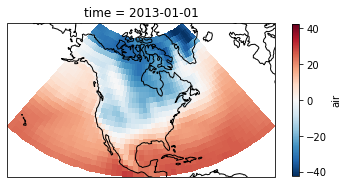

In [4]:
projection = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

f, ax = plt.subplots(subplot_kw=dict(projection=projection))

air.isel(time=0).plot(transform=ccrs.PlateCarree(), cbar_kwargs=dict(shrink=0.7))
ax.coastlines()

### Stack Overflow tutorial:

In [4]:
import cfgrib
import xarray as xr

import pandas as pd

In [5]:
# Import data
grib_data = cfgrib.open_datasets('weather/download.grib')
grib_data

[<xarray.Dataset>
 Dimensions:              (time: 12, latitude: 1801, longitude: 3600)
 Coordinates:
     number               int64 0
   * time                 (time) datetime64[ns] 1950-01-01 ... 1950-12-01
     step                 timedelta64[ns] 00:00:00
     depthBelowLandLayer  float64 0.0
   * latitude             (latitude) float64 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
   * longitude            (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
     valid_time           (time) datetime64[ns] ...
 Data variables:
     stl1                 (time, latitude, longitude) float32 ...
 Attributes:
     GRIB_edition:            1
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather Forecasts,
 <xarray.Dataset>
 Dimensions:              (time: 12, latitude: 1801, longitude: 3600)
 Coo

In [8]:
len(grib_data)

5

In [9]:
grib_data[4]

<xarray.Dataset>
Dimensions:     (time: 12, latitude: 1801, longitude: 3600)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1950-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
    valid_time  (time) datetime64[ns] 1950-01-01 1950-02-01 ... 1950-12-01
Data variables:
    lmlt        (time, latitude, longitude) float32 ...
    lblt        (time, latitude, longitude) float32 ...
    ltlt        (time, latitude, longitude) float32 ...
    lict        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:

# Merge both tp arrays into one on the time dimension
grib_precip = xr.merge([grib_data[1], grib_data[2]], compat='override')

In [7]:
grib_precip

<xarray.Dataset>
Dimensions:              (time: 12, latitude: 1801, longitude: 3600)
Coordinates:
    number               int64 0
  * time                 (time) datetime64[ns] 1950-01-01 ... 1950-12-01
    step                 timedelta64[ns] 00:00:00
    depthBelowLandLayer  float64 7.0
  * latitude             (latitude) float64 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude            (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
    valid_time           (time) datetime64[ns] ...
Data variables:
    stl2                 (time, latitude, longitude) float32 ...
    stl3                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [11]:

# Aggregate data by year
grib_precip_year = grib_precip.resample(time="M", skipna=True).mean()

In [12]:

# Data from xarray to pandas
grib_precip_pd = grib_precip_year.to_dataframe()

In [13]:
grib_precip_pd

number   step  depthBelowLandLayer        stl2  \
latitude longitude time                                                         
 90.0    0.0       1950-01-31       0 0 days                  7.0         NaN   
                   1950-02-28       0 0 days                  7.0         NaN   
                   1950-03-31       0 0 days                  7.0         NaN   
                   1950-04-30       0 0 days                  7.0         NaN   
                   1950-05-31       0 0 days                  7.0         NaN   
...                               ...    ...                  ...         ...   
-90.0    359.9     1950-08-31       0 0 days                  7.0  220.961090   
                   1950-09-30       0 0 days                  7.0  220.167374   
                   1950-10-31       0 0 days                  7.0  220.901810   
                   1950-11-30       0 0 days                  7.0  223.434937   
                   1950-12-31       0 0 days                  7.0  227.581909   

                                     stl3  
latitude longitude time                    
 90.0    0.0       1950-01-31         NaN  
                   1950-02-28         NaN  
                   1950-03-31         NaN  
                   1950-04-30         NaN  
                   1950-05-31         NaN  
...                                   ...  
-90.0    359.9     1950-08-31  221.240021  
                   1950-09-30  220.514542  
                   1950-10-31  220.686554  
                   1950-11-30  222.676147  
                   1950-12-31  226.384201  

[77803200 rows x 5 columns]

In [21]:
grib_precip_pd['depthBelowLandLayer'].unique()

array([7.])

In [26]:
filtered_grib = grib_precip_pd.drop(["number", "step", "depthBelowLandLayer"], axis=1).dropna()

In [31]:
filtered_grib.reset_index(inplace=True)

In [33]:
len(filtered_grib["latitude"].unique())

1676

In [34]:
len(filtered_grib["longitude"].unique())

3600

In [43]:
filtered_grib["site_id"] = filtered_grib["latitude"].astype(str) + "_" + filtered_grib["longitude"].astype(str)

In [44]:
filtered_grib

,latitude,longitude,time,stl2,stl3,site_id
0,83.5,323.4,1950-01-31,246.441467,247.815323,83.50000000000037_323.40000000000504
1,83.5,323.4,1950-02-28,244.538116,245.564133,83.50000000000037_323.40000000000504
2,83.5,323.4,1950-03-31,242.812195,243.697021,83.50000000000037_323.40000000000504
3,83.5,323.4,1950-04-30,243.023026,243.301651,83.50000000000037_323.40000000000504
4,83.5,323.4,1950-05-31,246.508347,245.566132,83.50000000000037_323.40000000000504
...,...,...,...,...,...,...
26554351,-90.0,359.9,1950-08-31,220.961090,221.240021,-90.0_359.9
26554352,-90.0,359.9,1950-09-30,220.167374,220.514542,-90.0_359.9
26554353,-90.0,359.9,1950-10-31,220.901810,220.686554,-90.0_359.9
26554354,-90.0,359.9,1950-11-30,223.434937,222.676147,-90.0_359.9


In [46]:
len(filtered_grib['site_id'].unique())

2212863

In [2]:
## For Peici

import cfgrib
import xarray as xr

import pandas as pd

# Import data
# change to wherever your download is stored
grib_data = cfgrib.open_datasets('weather/download.grib')

# view the data if you need to
grib_data

# No idea what this does
grib_temp = xr.merge([grib_data[1], grib_data[2]], compat='override')

# Aggregate data by month
grib_temp_month = grib_temp.resample(time="M", skipna=True).mean()

# Data from xarray to pandas
grib_temp_pd = grib_temp_month.to_dataframe()

# filter out unneccessary columns
filtered_grib = grib_temp_pd.drop(["number", "step", "depthBelowLandLayer"], axis=1).dropna()

# Get lat, long, and time as columns
filtered_grib.reset_index(inplace=True)

In [3]:
filtered_grib

,latitude,longitude,time,stl2,stl3
0,83.5,323.4,1950-01-31,246.441467,247.815323
1,83.5,323.4,1950-02-28,244.538116,245.564133
2,83.5,323.4,1950-03-31,242.812195,243.697021
3,83.5,323.4,1950-04-30,243.023026,243.301651
4,83.5,323.4,1950-05-31,246.508347,245.566132
...,...,...,...,...,...
26554351,-90.0,359.9,1950-08-31,220.961090,221.240021
26554352,-90.0,359.9,1950-09-30,220.167374,220.514542
26554353,-90.0,359.9,1950-10-31,220.901810,220.686554
26554354,-90.0,359.9,1950-11-30,223.434937,222.676147


In [4]:
filtered_grib['diff'] = filtered_grib['stl2'] - filtered_grib['stl3']

In [5]:
import matplotlib.pyplot as plt

(array([2.8600000e+03, 6.6320000e+03, 7.4448000e+04, 1.5008910e+06,
        2.0619101e+07, 3.8817870e+06, 4.4649400e+05, 2.1397000e+04,
        7.2800000e+02, 1.8000000e+01]),
 array([-19.41949463, -15.23504353, -11.05059242,  -6.86614084,
         -2.6816895 ,   1.50276184,   5.68721294,   9.87166405,
         14.0561161 ,  18.24056625,  22.42501831]),
 <BarContainer object of 10 artists>)

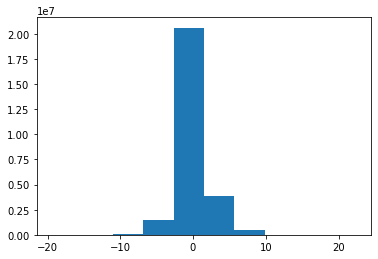

In [6]:
plt.hist(filtered_grib['diff'])

In [8]:
filtered_grib['time'].unique()

<DatetimeArray>
['1950-01-31 00:00:00', '1950-02-28 00:00:00', '1950-03-31 00:00:00',
 '1950-04-30 00:00:00', '1950-05-31 00:00:00', '1950-06-30 00:00:00',
 '1950-07-31 00:00:00', '1950-08-31 00:00:00', '1950-09-30 00:00:00',
 '1950-10-31 00:00:00', '1950-11-30 00:00:00', '1950-12-31 00:00:00']
Length: 12, dtype: datetime64[ns]

## Work 6/30

In [20]:
import cfgrib
import xarray as xr

import pandas as pd
import numpy as np

grib_data = cfgrib.open_datasets('weather/download.grib')
surface_temp = grib_data[4]

In [22]:
surface_temp_df

valid_time        lmlt        lblt        ltlt  \
time       latitude longitude                                                  
1950-01-01  83.5    323.4     1950-01-01  273.150146  275.226807  274.390381   
                    323.5     1950-01-01  273.149658  275.226318  274.389893   
                    323.6     1950-01-01  273.150146  275.226807  274.390381   
                    323.7     1950-01-01  273.150146  275.226807  274.390381   
                    323.8     1950-01-01  273.150146  275.226807  274.390381   
...                                  ...         ...         ...         ...   
1950-12-01 -90.0    359.5     1950-12-01  273.149658  277.130127  275.687256   
                    359.6     1950-12-01  273.149658  277.130127  275.687256   
                    359.7     1950-12-01  273.149658  277.130127  275.687256   
                    359.8     1950-12-01  273.149658  277.130127  275.687256   
                    359.9     1950-12-01  273.149658  277.130127  275.687256   

                                     lict  
time       latitude longitude              
1950-01-01  83.5    323.4      237.269684  
                    323.5      237.269684  
                    323.6      237.269684  
                    323.7      237.269684  
                    323.8      237.269684  
...                                   ...  
1950-12-01 -90.0    359.5      247.221680  
                    359.6      247.221680  
                    359.7      247.221680  
                    359.8      247.221680  
                    359.9      247.221680  

[26554356 rows x 5 columns]

In [68]:
surface_temp_df = surface_temp.to_dataframe().dropna().drop(["number", "step", "surface"], axis=1)

surface_temp_df['temp'] = surface_temp_df[['lmlt', 'lblt', 'ltlt', 'lict']].mean(axis=1)

surface_temp_df.drop(['valid_time', 'lmlt', 'lblt', 'ltlt', 'lict'], axis=1, inplace=True)

surface_temp_df.reset_index(inplace=True)

In [69]:

surface_temp_df['lon_180'] = np.mod(surface_temp_df['longitude'] - 180.0, 360.0) - 180.0
surface_temp_df

,time,latitude,longitude,temp,lon_180
0,1950-01-01,83.5,323.4,265.009247,-36.6
1,1950-01-01,83.5,323.5,265.008881,-36.5
2,1950-01-01,83.5,323.6,265.009247,-36.4
3,1950-01-01,83.5,323.7,265.009247,-36.3
4,1950-01-01,83.5,323.8,265.009247,-36.2
...,...,...,...,...,...
26554351,1950-12-01,-90.0,359.5,268.297180,-0.5
26554352,1950-12-01,-90.0,359.6,268.297180,-0.4
26554353,1950-12-01,-90.0,359.7,268.297180,-0.3
26554354,1950-12-01,-90.0,359.8,268.297180,-0.2


In [28]:
# Filter out to only include specific lat/long values. Making a dummy dataframe. 

site_coords = (42.5429, -72.2011)

In [70]:
print(surface_temp_df[(abs(surface_temp_df.latitude - site_coords[0]) <= 0.05) &
                 (abs(surface_temp_df.lon_180 - site_coords[1]) <= 0.05)].reset_index(drop=True))

         time  latitude  longitude        temp  lon_180
0  1950-01-01      42.5      287.8  272.718597    -72.2
1  1950-02-01      42.5      287.8  271.692627    -72.2
2  1950-03-01      42.5      287.8  271.941711    -72.2
3  1950-04-01      42.5      287.8  274.924744    -72.2
4  1950-05-01      42.5      287.8  279.199738    -72.2
5  1950-06-01      42.5      287.8  283.648712    -72.2
6  1950-07-01      42.5      287.8  285.415771    -72.2
7  1950-08-01      42.5      287.8  285.417053    -72.2
8  1950-09-01      42.5      287.8  283.923645    -72.2
9  1950-10-01      42.5      287.8  281.598541    -72.2
10 1950-11-01      42.5      287.8  278.529266    -72.2
11 1950-12-01      42.5      287.8  274.082947    -72.2


In [40]:
print(list(surface_temp_df['latitude'].unique().round()))
print(list((np.mod(surface_temp_df['longitude'] - 180.0, 360.0) - 180.0).unique().round()))

[84.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 83.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.

[-37.0, -36.0, -36.0, -36.0, -36.0, -36.0, -36.0, -36.0, -36.0, -36.0, -36.0, -35.0, -35.0, -35.0, -35.0, -35.0, -35.0, -35.0, -35.0, -35.0, -35.0, -34.0, -34.0, -34.0, -34.0, -34.0, -34.0, -34.0, -34.0, -34.0, -34.0, -33.0, -33.0, -33.0, -33.0, -33.0, -33.0, -33.0, -33.0, -33.0, -33.0, -32.0, -32.0, -32.0, -32.0, -32.0, -32.0, -32.0, -32.0, -32.0, -32.0, -31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -31.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -29.0, -29.0, -29.0, -29.0, -29.0, -29.0, -29.0, -29.0, -29.0, -29.0, -28.0, -28.0, -28.0, -38.0, -38.0, -38.0, -38.0, -38.0, -38.0, -37.0, -37.0, -37.0, -37.0, -37.0, -37.0, -37.0, -37.0, -37.0, -28.0, -28.0, -28.0, -28.0, -28.0, -28.0, -28.0, -27.0, -27.0, -27.0, -27.0, -41.0, -41.0, -40.0, -40.0, -40.0, -40.0, -40.0, -40.0, -40.0, -39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -39.0, -38.0, -38.0, -38.0, -38.0, -27.0, -27.0, -27.0, -27.0, -27.0, -27.0, -26.0, -26.0, -26.0, -26.0

In [75]:
surface_temp_df['year'] = surface_temp_df.time.dt.to_period('Y')
surface_temp_df['doy'] = surface_temp_df.time.dt.strftime('%j').astype(int)

In [76]:
surface_temp_df

,time,latitude,longitude,temp,lon_180,year,doy
0,1950-01-01,83.5,323.4,265.009247,-36.6,1950,1
1,1950-01-01,83.5,323.5,265.008881,-36.5,1950,1
2,1950-01-01,83.5,323.6,265.009247,-36.4,1950,1
3,1950-01-01,83.5,323.7,265.009247,-36.3,1950,1
4,1950-01-01,83.5,323.8,265.009247,-36.2,1950,1
...,...,...,...,...,...,...,...
26554351,1950-12-01,-90.0,359.5,268.297180,-0.5,1950,335
26554352,1950-12-01,-90.0,359.6,268.297180,-0.4,1950,335
26554353,1950-12-01,-90.0,359.7,268.297180,-0.3,1950,335
26554354,1950-12-01,-90.0,359.8,268.297180,-0.2,1950,335


In [87]:
climate_df = grib_data[4].to_dataframe().dropna().drop(["number", "step", "surface"], axis=1)

climate_df['temp'] = climate_df[['lmlt', 'lblt', 'ltlt', 'lict']].mean(axis=1)

climate_df.drop(['valid_time', 'lmlt', 'lblt', 'ltlt', 'lict'], axis=1, inplace=True)

climate_df.reset_index(inplace=True)

climate_df['lon_180'] = np.mod(surface_temp_df['longitude'] - 180.0, 360.0) - 180.0

In [90]:
climate_df

,time,latitude,longitude,temp,lon_180
0,1950-01-01,83.5,323.4,265.009247,-36.6
1,1950-01-01,83.5,323.5,265.008881,-36.5
2,1950-01-01,83.5,323.6,265.009247,-36.4
3,1950-01-01,83.5,323.7,265.009247,-36.3
4,1950-01-01,83.5,323.8,265.009247,-36.2
...,...,...,...,...,...
26554351,1950-12-01,-90.0,359.5,268.297180,-0.5
26554352,1950-12-01,-90.0,359.6,268.297180,-0.4
26554353,1950-12-01,-90.0,359.7,268.297180,-0.3
26554354,1950-12-01,-90.0,359.8,268.297180,-0.2


In [99]:
def get_site_weather_history(full_climate_df, latitude, longitude, site_id):
    small_df = full_climate_df[(abs(full_climate_df.latitude - latitude) <= 0.05) &
                 (abs(full_climate_df['lon_180'] - longitude) <= 0.05)].reset_index(drop=True)
    
    small_df['year'] = small_df.time.dt.to_period('Y')
    small_df['doy'] = small_df.time.dt.strftime('%j').astype(int)
    
    small_df.drop('longitude', axis=1, inplace=True)
    
    small_df.rename(columns={'lon_180': 'longitude', 
                    'temp': 'temperature'}, inplace=True)
    
    small_df['site_id'] = site_id
    
    small_df = small_df[['site_id', 'temperature', 'year', 'doy', 'latitude', 'longitude']]
    
    return small_df

In [100]:
get_site_weather_history(climate_df, 42.5429, -72.2011, 1)

,site_id,temperature,year,doy,latitude,longitude
0,1,272.718597,1950,1,42.5,-72.2
1,1,271.692627,1950,32,42.5,-72.2
2,1,271.941711,1950,60,42.5,-72.2
3,1,274.924744,1950,91,42.5,-72.2
4,1,279.199738,1950,121,42.5,-72.2
5,1,283.648712,1950,152,42.5,-72.2
6,1,285.415771,1950,182,42.5,-72.2
7,1,285.417053,1950,213,42.5,-72.2
8,1,283.923645,1950,244,42.5,-72.2
9,1,281.598541,1950,274,42.5,-72.2


predictors.head()
    site_id  temperature  year  doy  latitude  longitude  daylength
0        1        -3.86  1989    0   42.5429   -72.2011       8.94
1        1        -4.71  1989    1   42.5429   -72.2011       8.95
2        1        -1.56  1989    2   42.5429   -72.2011       8.97
3        1        -7.88  1989    3   42.5429   -72.2011       8.98
4        1       -15.24  1989    4   42.5429   -72.2011       9.00

TODO: get day length from latitude